# UNSEEN-open: UK February 2020 precipitation 

In this project, the aim is to build an open, reproducible, and transferable workflow for UNSEEN -- an increasingly popular method that exploits seasonal prediction systems to assess and anticipate climate extremes beyond the observed record. The approach uses pooled forecasts as plausible alternate realities. Instead of the 'single realization' of reality, pooled forecasts can be exploited to better assess the likelihood of infrequent events. 
We will illustrate the application for February 2020 precipitation, which was the highest on record in the UK: with what frequency of occurrence can February extreme precipitation events such as the 2020 event be expected?

### Import packages

In [1]:
##This is so variables get printed within jupyter
from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

In [3]:
##import packages
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import regionmask

In [4]:
##We want the working directory to be the UNSEEN-open directory
pwd = os.getcwd()  ##current working directory is UNSEEN-open/Notebooks/1.Download
pwd  #print the present working directory
os.chdir(pwd + '/../')  # Change the working directory to UNSEEN-open
os.getcwd()  #print the working directory

'/lustre/soge1/projects/ls/personal/timo/UNSEEN-open/Notebooks'

'/lustre/soge1/projects/ls/personal/timo/UNSEEN-open'

## Download

We download the data from the Climate Data Store ([CDS](https://cds.climate.copernicus.eu/cdsapp#!/search?type=dataset)). 
For how to get started with CDS, see notebook [1.1 SetUp](1.Download/1.1SetUp.ipynb).



### SEAS5
We will be using the SEAS5 hindcast, which is a dataset running from 1981-2016. The hindcast is initialized every month with 25 ensemble members and the forecast run for 6 months, indicated by blue horizontal bars below. February is forecasted by 6 initialization months (September-February). We discard the first month of the forecast because of dependence between the forecasts, explained in the evaluation section and are left with 5 initialization months (Sep-Jan) and 25 ensemble members forecasting February precipitation each year, totalling to an increase of 125 times the observed length.

For a summary of all available C3S seasonal hindcasts, their initialization months and more specifics, please see [ECMWF page](https://confluence.ecmwf.int/display/CKB/C3S+Seasonal+Forecasts) and the [SEAS5 paper](https://doi.org/10.5194/gmd-12-1087-2019).  




![title](../graphs/Data_illustration.png)

From CDS, we retrieve SEAS5 in notebook [1.2 Retrieve](1.Download/1.2Retrieve.ipynb) and concatenate the retrieved files in notebook [1.3 Merge](1.Download/1.3Merge.ipynb). We create a netcdf file containing the dimensions lat, lon, time (35 years), number (25 ensembles) and leadtime (5 initialization months).

In [6]:
SEAS5 = xr.open_dataset('../UK_example/SEAS5/SEAS5.nc')
SEAS5

<xarray.Dataset>
Dimensions:    (latitude: 11, leadtime: 5, longitude: 14, number: 25, time: 35)
Coordinates:
  * longitude  (longitude) float32 -11.0 -10.0 -9.0 -8.0 ... -1.0 0.0 1.0 2.0
  * time       (time) datetime64[ns] 1982-02-01 1983-02-01 ... 2016-02-01
  * latitude   (latitude) float32 60.0 59.0 58.0 57.0 ... 53.0 52.0 51.0 50.0
  * number     (number) int32 0 1 2 3 4 5 6 7 8 9 ... 16 17 18 19 20 21 22 23 24
  * leadtime   (leadtime) int64 2 3 4 5 6
Data variables:
    tprate     (leadtime, time, number, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-05-13 14:49:43 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

### E-OBS

EOBS can normally also be retrieved through CDS, as in notebook [1.2 Retrieve](1.Download/1.2Retrieve.ipynb). Unfortunately,  the product is temporally disabled for maintenance purposes. I downloaded EOBS (from 1950 - 2019) and the most recent EOBS data (2020) [here](https://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php). 

The data has a daily timestep, so I resample the data into monthly average mm/day in notebook [1.3 Merge](1.Download/1.3Merge.ipynb). I chose not to use the total monthly precipitation because of leap days. Finally I store a netcdf with only February precipitation, resulting in 71 values, one for each year within 1950 - 2020 over the European domain (25N-75N x 40W-75E). 

In [11]:
EOBS = xr.open_dataset('../UK_example/EOBS/EOBS.nc')
EOBS

<xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 464, time: 71)
Coordinates:
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 1950-02-28 1951-02-28 ... 2020-02-29
Data variables:
    rr         (time, latitude, longitude) float32 ...

## The February 2020 anomaly

Here I illustrate how anomalous the February 2020 precipitation was across Europe based on EOBS. 

I calculate the anomaly (deviation from the mean in mm/d) and divide this by the standard deviation to obtain the standardized anomalies. 

In [24]:
EOBS2020_anomaly = EOBS.sel(time = '2020')['rr'] - EOBS.sel(time = slice('1950','2019'))['rr'].mean('time')
EOBS2020_sd_anomaly = EOBS2020_anomaly/EOBS.sel(time = slice('1950','2019'))['rr'].std('time')

EOBS2020_sd_anomaly.attrs = {'long_name': 'Monthly precipitation standardized anomaly',
 'units': '-'}

EOBS2020_sd_anomaly

<xarray.DataArray 'rr' (time: 1, latitude: 201, longitude: 464)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 2020-02-29
Attributes:
    long_name:  Monthly precipitation standardized anomaly
    units:      -

Text(0.5, 1.0, 'February 2020')

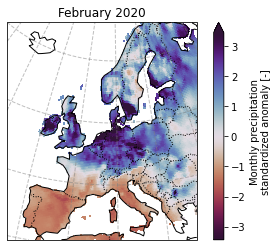

In [27]:
ax = plt.axes(projection=ccrs.EuroPP())
EOBS2020_sd_anomaly.sel(time='2020-02').plot(transform=ccrs.PlateCarree(),
                                             robust=True,
                                             cmap=plt.cm.twilight_shifted_r,
                                             ax=ax)

ax.coastlines(resolution='110m')
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

gl = ax.gridlines(crs=ccrs.PlateCarree(),
                  draw_labels=False,
                  linewidth=1,
                  color='gray',
                  alpha=0.5,
                  linestyle='--')
gl.ylocator = mticker.FixedLocator([35, 45, 55, 65])

ax.set_title('February 2020')

# plt.savefig('graphs/February_2020_precipAnomaly.png', dpi=300)

This graph shows that it has been very wet, with standardized anomalies > 2, for many parts of northwest Europe. Especially in the UK and the Netherlands we find large anomalies. We will first focus on UK precipitation, and assess how SEAS5 can be exploited to assess the frequency of occurrence of February extreme precipitation events such as the 2020 event.

Side note: in contrast to February, April has been very dry (I performed this analysis in May 2020) and I illustrated the large contrast in weather in this [notebook](2020_contrasting_weather.ipynb).

## UK masking

We create a mask for all 241 countries within [Regionmask](https://regionmask.readthedocs.io/en/stable/#), that has predefined countries from [Natural Earth datasets](http://www.naturalearthdata.com) (shapefiles). We use the mask to go from gridded precipitation to country-averaged timeseries. We start with UK, number 31 within the country mask. For more on masking, see notebook [1.4 Mask](1.Download/1.4Mask.ipynb).



In [ ]:
SEAS5_UK_weighted = xr..open_dataset('Data/SEAS5_UK_weighted.nc')
EOBS_UK_weighted = .to_pandas().to_csv('Data/EOBS_UK_weighted.csv') 